In [1]:
#Paketleri İmport Etme
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
custom_rc = {"figure.figsize": (8, 6)}
sns.set(rc=custom_rc)

In [3]:
# Veri Setini Bir Değişekene Kayıt Etme Ve Yedekleme İşlemi
medical = pd.read_csv("/content/insurance.csv")
df = medical.copy()

**Veri Setinin Özelliklerini İnceleme**

In [4]:
df.shape #Boyut Bilgisi

(1338, 7)

In [5]:
df.columns #Yer Alan Sütunlar

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.head() #İlk Beş Kaydı İnceleme

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info() # Sütünların Tip Bilgilerini Ve Missing Değerlerini İnceleme

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Age Ve Bmi değerlerinin daha iyi incelenebilmesi için gruplama yapılması**

In [8]:
# Yaş gruplarına göre kategorik değişken oluşturuldu
age_category= [
    (0, 18),
    (19, 25),
    (26, 30),
    (31, 35),
    (36, 40),
    (40, 45),
    (46, 50),
    (50, 55),
    (56, 60,),
    (61, 65),
    (66, 100)
]
df['age_category'] = pd.cut(df['age'], bins=[x[0] for x in age_category] + [age_category[-1][1]], labels=["0-18", "19-25", "26-30", "31-35", "36-40" , "40-45" , "46-50" , "50-55" , "56-60" , "61-65" , "66+"], right=False)


In [9]:
# Bmi gruplarına göre kategorik değişken oluşturuldu
bmi_category = [
    (0, 15),      #(Ciddi Aşırı Zayıf)
    (16, 18),     #(Aşırı Zayıf)
    (18.5, 24.9), # (Normal)
    (25, 29.9),   #(Kilolu)
    (30, 34.9),   #(Obez Tip 1)
    (35, 39.9),   #(Obez Tip 2)
    (40, float('inf'))  # 40+ için (Obez Tip 3)
]
df['bmi_category'] = pd.cut(df['bmi'], bins=[x[0] for x in bmi_category] + [bmi_category[-1][1]], labels=["Ciddi Aşırı Zayıf" , "Aşırı Zayıf" , "Normal", "Kilolu","Obez Tip 1" , "Obez Tip 2", "Obez Tip 3"], right=False)

In [10]:
# Spearman Korelasyonu İle Değişkenler Arasındaki İlişkiyi İnceleme
from scipy.stats import spearmanr
spearman_corr, p_value = spearmanr(df)

corr_df = pd.DataFrame(spearman_corr, columns=df.columns, index=df.columns)

# Korelasyonları görüntüleme
print("Spearman Korelasyon Katsayıları:\n", corr_df)
print("-------------------------------------------------------------------------")
print("-------------------------------------------------------------------------")
print("-------------------------------------------------------------------------")

# Korelasyonların istatististiksel olarak incelenmesi
p_values_df = pd.DataFrame(p_value, columns=df.columns, index=df.columns)

alpha = 0.05  # İstatistiksel anlamlılık düzeyi
significant_results = p_values_df.apply(lambda x: x < alpha)
print("P Değerleri:\n", p_values_df)
print("-------------------------------------------------------------------------")
print("-------------------------------------------------------------------------")
print("Anlamlı Korelasyonlar:\n", significant_results)

Spearman Korelasyon Katsayıları:
                    age       sex       bmi  children    smoker    region  \
age           1.000000 -0.020809  0.107736  0.056992 -0.025210  0.004315   
sex          -0.020809  1.000000  0.044802  0.015589  0.076185  0.004614   
bmi           0.107736  0.044802  1.000000  0.015607  0.002203  0.152959   
children      0.056992  0.015589  0.015607  1.000000  0.016583  0.010604   
smoker       -0.025210  0.076185  0.002203  0.016583  1.000000 -0.002155   
region        0.004315  0.004614  0.152959  0.010604 -0.002155  1.000000   
charges       0.534392  0.009490  0.119396  0.133339  0.663460 -0.043531   
age_category  0.993416 -0.020538  0.106855  0.050727 -0.024588  0.007545   
bmi_category  0.082201  0.048132  0.833152  0.011638  0.017086  0.113661   

               charges  age_category  bmi_category  
age           0.534392      0.993416      0.082201  
sex           0.009490     -0.020538      0.048132  
bmi           0.119396      0.106855      0.83

**Spearman Korelasyonu** yardımıyla değişkenlerin birbirleriyle olan ilişkilerini inceleyebiliriz. Buraya göre özellikle bireylerin aldıkları sağlık sigortası ücreti değerini gösteren charges değişkeni üzerinde sırayla en çok Smoker - Age - Children - Bmi değerlerinin etkisi olduğu görülebilmektedir.

**Görseller Yardımıyla Değişkenlerin Gözlenmesi**

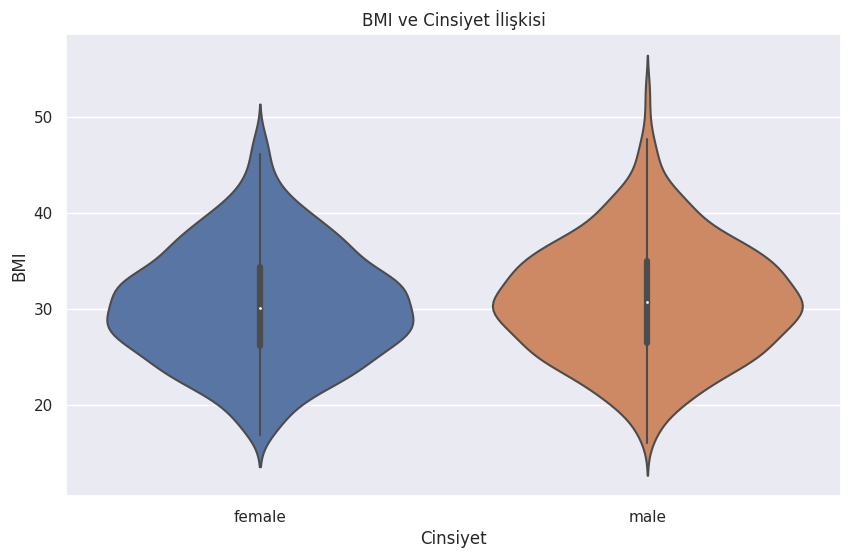

In [11]:
#Keman Grafiği İle BMI Ve SEX İlişkisi
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='bmi', data=df)
plt.title('BMI ve Cinsiyet İlişkisi')
plt.xlabel('Cinsiyet')
plt.ylabel('BMI')
plt.show()

**Keman Grafiği** ile veri setinde yer alan bireylere cinsiyet bazında bakıldığında cinsiyeti erkek olan bireylerin bmi değerlerinin kadınlara göre daha fazla bmi değeri ve daha az bmi değerlerine sahip oldukları görülebilmektedir. Genel olarak her iki cinsiyette ise 20 - 40 bmi değerlerine sahip oldukları söylenebilmektedir. Ayrıca Cinsiyetin Bmi değerleri üzerinde bir etkisi yoktur.

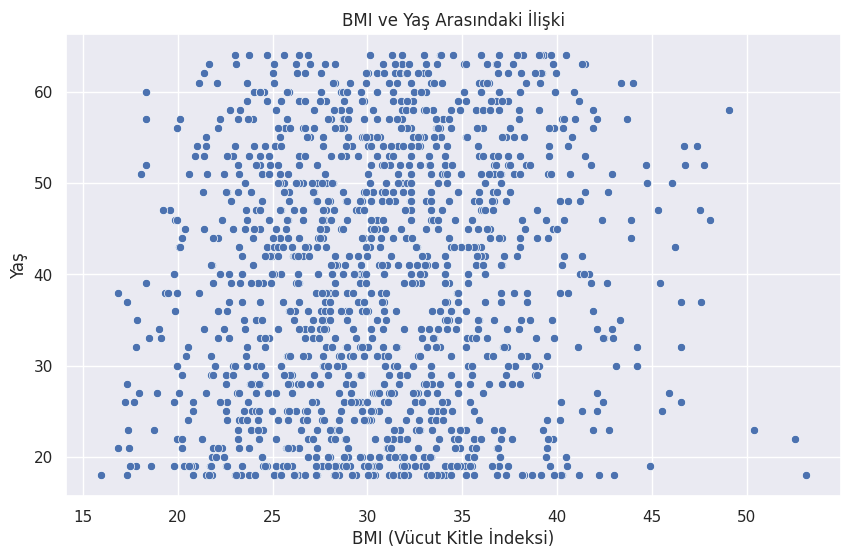

In [12]:
#Nokta Grafiği İle AGE Ve BMİ Değerlerinin İncelenmesi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='age', data=df)
plt.xlabel('BMI (Vücut Kitle İndeksi)')
plt.ylabel('Yaş')
plt.title('BMI ve Yaş Arasındaki İlişki')
plt.show()

**Nokta grafiği** ile bmi ve age arasındaki ilişki ele alındığında, normalde bireylerin sağlıklı olarak değerlendirilebilmesi için bmi değerlerinin her yaş grubunda 18,5 ile 24,5 arasında olması beklenmektedir. Buradan da görüldüğü üzere her yaş grubunda 18 altı ve 24.5 bmi üzerinde bireylerin bulunduğu görülebilmektedir. Ayrıca bireylerin sahip oldukları bmi değerleri üzerinde yaşlarının çok az etkisi olduğu söylenebilir.

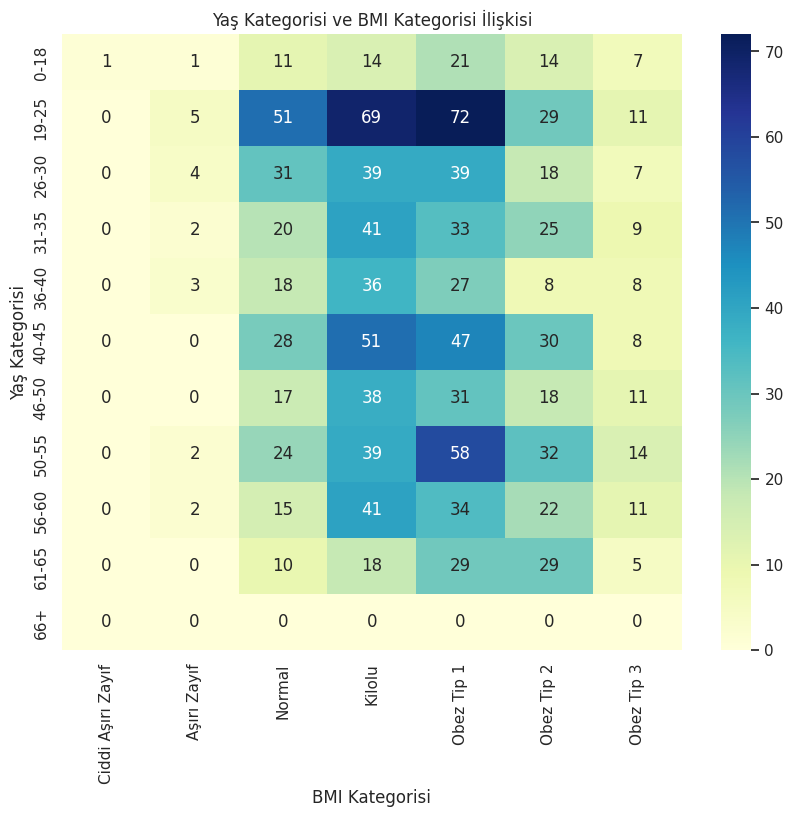

In [13]:
#Isı Haritası İle AGE_CATEGORY Ve BMI_CATEGORY Değerlerinin İncelenmesi
data_to_plot = df[['age_category', 'bmi_category']]
relationship_matrix = data_to_plot.groupby(['age_category', 'bmi_category']).size().unstack()

relationship_matrix = relationship_matrix.fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(relationship_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Yaş Kategorisi ve BMI Kategorisi İlişkisi')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Yaş Kategorisi')
plt.show()

**Isı Haritası** İle Age değerlerine göre Ve Bmi değerleri incelendiğinde :
Veri setinde bulunan 1338 bireyin toplamda 386 kişi kilolu kategorisinde , 391 kişi Obez Tip 1 kategorisinde , 225 kişi Obez Tip 2 Kategorisinde ve 91 kişi ise Obez Tip 3 kategorisinde yer almaktadır. Buna göre veri setimizdeki bireylerden her yaştan 1093 kişinin normalin üstünde kilolu olduğu görülebilmektedir. Bu durumda bir kişinin sağlık sigortası ücreti üzerinde Age ve Bmi değerinin etkisi olduğunu düşünürsek bu değerler arttıkça Charges değişkeninde arttığını anlayabiliriz.

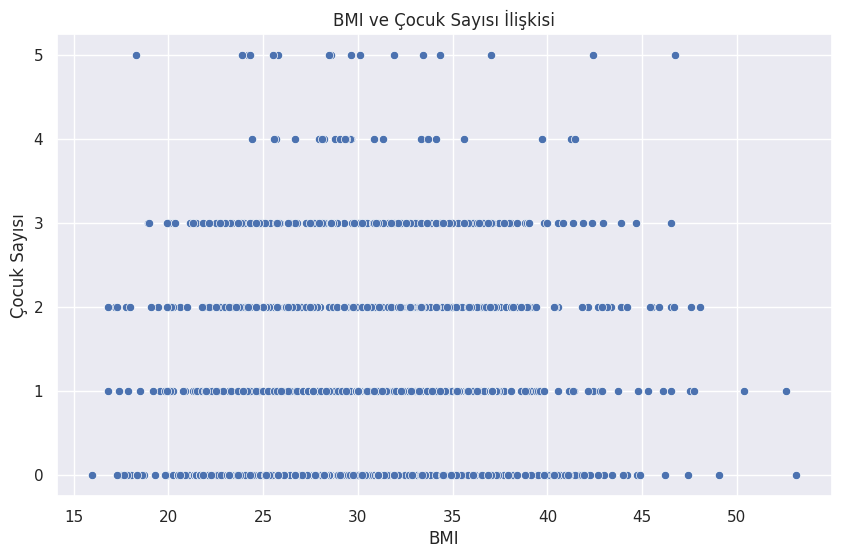

In [14]:
# Dağılım Grafiği İle BMİ Ve Children Değerlerinin İncelenmesi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='children', data=df)
plt.title('BMI ve Çocuk Sayısı İlişkisi')
plt.xlabel('BMI')
plt.ylabel('Çocuk Sayısı')
plt.show()


**Dağılım grafiği** ile Bmi Ve Children değerlerini incelediğimizde, bireylerin sahip oldukları çoçuk sayısı arttıkça Bmi değerlerininde arttığı gözlemlenebiliyor. Bunu daha iyi gözlemleyebilmek için Isı Haritası ile incelemek daha faydalı olacaktır.



<ipython-input-15-0e2382ae24b6>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = pivot_data.pivot('bmi_category', 'children', 'count')


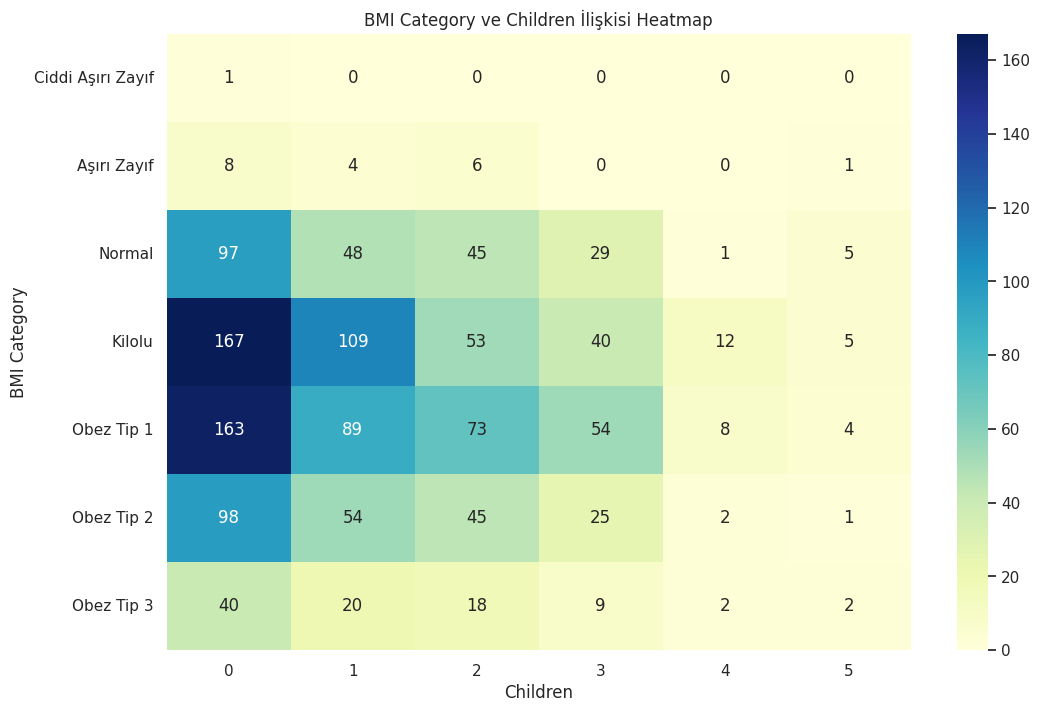

In [15]:
#Isı haritası
pivot_data = df.groupby(['children', 'bmi_category']).size().reset_index(name='count')
heatmap_data = pivot_data.pivot('bmi_category', 'children', 'count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('BMI Category ve Children İlişkisi Heatmap')
plt.xlabel('Children')
plt.ylabel('BMI Category')
plt.show()

Burada **Isı Haritası** yardımıyla Bmi ve Children ele alındığında, bireylerin çoçuk sayısı oranında artış oldukça Bmi değerlerinde azalış olduğu görülürken  aynı zamanda normal Bmi değerlerine sahip olan bireylerin çoçuk sayısındaki artış bu sefer tam tersi etki yaparak Bmi değerini arttırmakta olduğunu görebiliyoruz. Ancak burada 1093 kişinin normalin üstünde bmi değerine sahip olduğu ve children değerinin Charges değişekni üzerinde etkisi olduğu için bireyin sahip olduğu çoçuk sayısı düştükçe daha fazla sağlık sigortası ücreti aldıkları anlaşılabilmektedir.

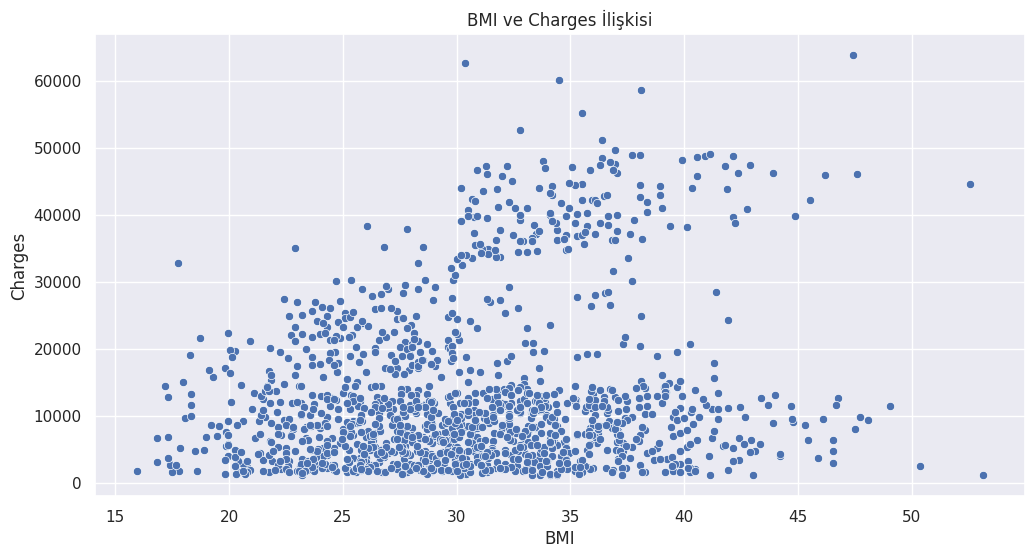

In [16]:
#Saçılma Grafiği İle BMI Ve Charges Değişkenini İnceleme
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI ve Charges İlişkisi')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

**Saçılma grafiği** ile Bmi ile Charges arasındaki ilişkiyi incelediğimizde, genel olarak bireyin Bmi değerinde artış oldukça aldıkları sigorta ödemeleri oranıda artmaktadır. Ancak yine bu grafikte görüldüğü gibi Charges değişkeninin aykırı değer içerebildiğide görülebilmektedir. Örneğin 45-50 Bmi değere sahip bir kişinin sağlık sigortası ödemesi 60.000 üstünde yer almış ancak yine 45-50 arasındaki bir bireyin ödemesi daha düşük olmuştur.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Age**
Yaş verisi için ortalama yaş 39.21'dir, bu da sigorta başvurularının yapıldığı kişilerin yaşlarının genellikle bu değere yakın olduğunu gösterir. Standart sapma 14.05'tir, bu da yaşların ortalamadan oldukça farklılaşabileceğini ve geniş bir dağılıma sahip olduğunu gösterir.

**Bmi**
Vücut kitle indeksi (BMI) verisi için ortalama BMI 30.66'dır, bu da sigorta başvurularının yapıldığı kişilerin genellikle kilolu veya obez olduğunu gösterir. Standart sapma 6.10'dur, bu da BMI değerlerinin oldukça değişken olduğunu ve bazı kişilerin düşük BMI'ye sahip olduğunu, bazılarının ise yüksek BMI'ye sahip olduğunu gösterir.

**Children**
Çocuk sayısı verisi için ortalama çocuk sayısı 1.09'dur, bu da sigorta sahiplerinin çoğunun bir veya hiç çocuğunun olmadığını gösterir. Standart sapma 1.21'dir, bu da çocuk sayısının oldukça değişken olduğunu ve bazı sigorta sahiplerinin çok sayıda çocuğa sahip olduğunu gösterir.

**Charges**
Sigorta ücretleri verisi için ortalama sigorta ücreti oldukça yüksektir(13,27). Ancak, standart sapma da oldukça büyük (12,11) ve bu, sigorta ücretlerinin geniş bir aralığa yayıldığını ve büyük varyasyonlar içerdiğini gösterir.

*Sonuç olarak,* bu veri setimizde, sağlık sigortası ücretlerinin oldukça büyük varyasyonlar içerdiği ve diğer değişkenlerin de sigorta ücretini etkileyebilecek faktörler olduğu anlaşılıyor. Ortalama ve standart sapma, veri setinin merkezi eğilimini ve dağılımını anlamamıza yardımcı oluyor.

Bu veri setimizin varyasyonlar içerdiğini tespit ettiğimiz için shapiro wilk testi ile normallik testi yapıyoruz.

In [18]:
#shapiro wilk testi
from scipy import stats
nrml_distribution = df[['age', 'charges', 'bmi', 'children']]
for i in nrml_distribution.columns:
    statistik, p_degeri = stats.shapiro(nrml_distribution[i])
    print(f'{i} - Statistik: {statistik}, p-değeri: {p_degeri}')
    alfa = 0.05
    if p_degeri > alfa:
        print(f'{i} için veri normal bir dağılıma sahiptir (H0 reddedilmedi)')
        print("                                                             ")
    else:
        print(f'{i} için veri normal bir dağılıma sahip değildir (H0 reddedildi)')
        print("                                                             ")

age - Statistik: 0.9446989893913269, p-değeri: 5.687060076887153e-22
age için veri normal bir dağılıma sahip değildir (H0 reddedildi)
                                                             
charges - Statistik: 0.8146880865097046, p-değeri: 1.1505194006561963e-36
charges için veri normal bir dağılıma sahip değildir (H0 reddedildi)
                                                             
bmi - Statistik: 0.9938861727714539, p-değeri: 2.6033414542325772e-05
bmi için veri normal bir dağılıma sahip değildir (H0 reddedildi)
                                                             
children - Statistik: 0.8231810331344604, p-değeri: 5.06690727121734e-36
children için veri normal bir dağılıma sahip değildir (H0 reddedildi)
                                                             


**Shapiro Wilk Testi** yardımıyla AGE - CHARGES - BMI - CHİLDREN değişkenlerimizin Normal Dağılıma uymadığını göstermektedir.
Aşağıda görsel olarakta inceleyebilirsiniz.

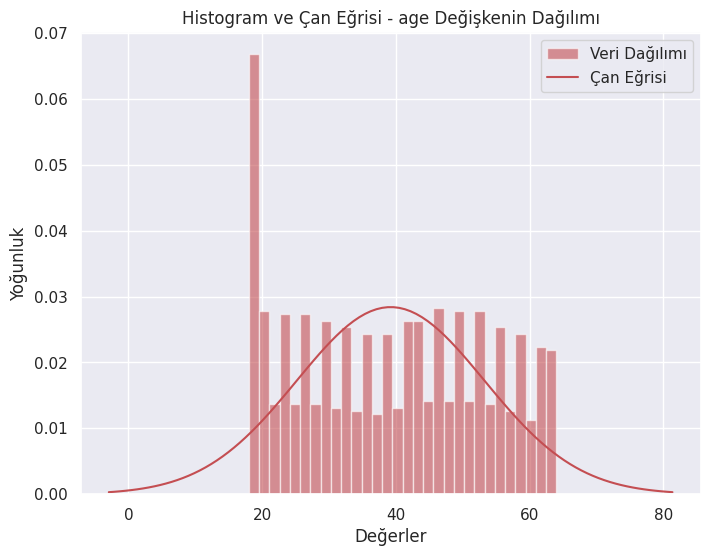

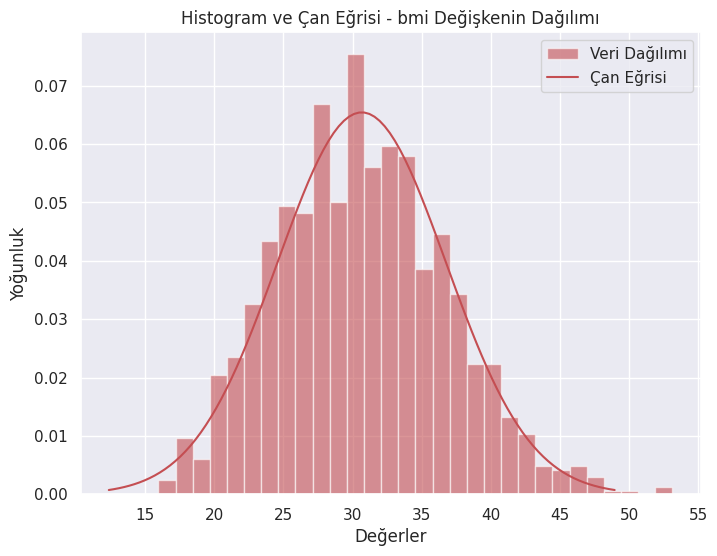

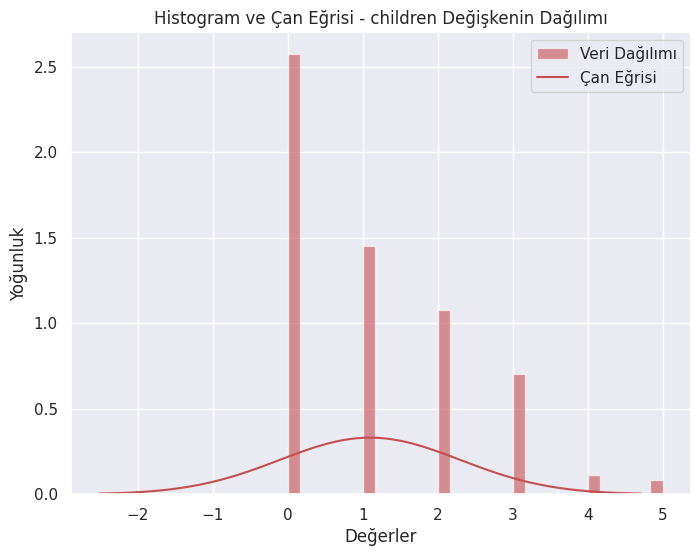

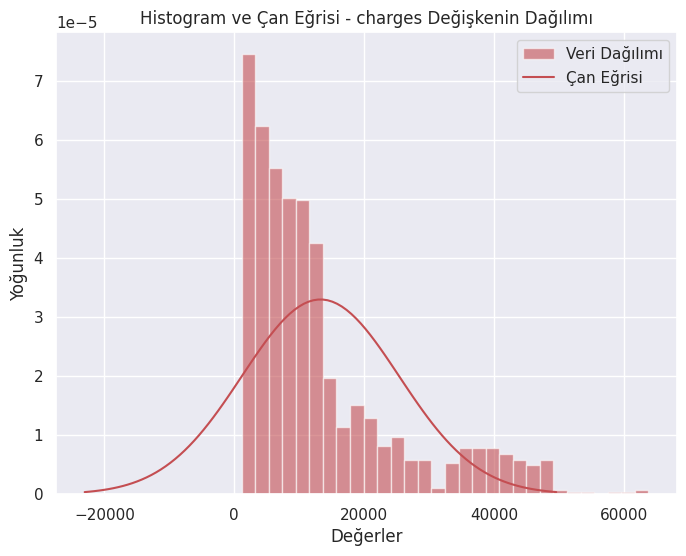

In [19]:
#Histogram Grafiği Çizimi
import scipy.stats as stats

for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        plt.hist(df[i], bins=30, density=True, alpha=0.6, color='r', label='Veri Dağılımı')
        mu, sigma = np.mean(df[i]), np.std(df[i])
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label='Çan Eğrisi')
        plt.title(f'Histogram ve Çan Eğrisi - {i} Değişkenin Dağılımı')
        plt.xlabel('Değerler')
        plt.ylabel('Yoğunluk')
        plt.legend()
        plt.show()

Görsel olarak incelendiğinde Bmi değişkeni diğerlerine oranla biraz daha iyi normal dağılım göstermektedir. Normal dağılım göstermemelerinin sebebi veri setinde aykırı değerler (outlier) olduğu için olabilir. Bunun için önce **boxplot** ile görselleştirme yapılarak aykırı değerlerin olup olmadığını tespit etmeliyiz.

In [20]:
def outlier_thresholds(df, col_name, q1=0.25, q3=0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

    return low_limit, up_limit

def check_outlier(df, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(df, col_name, q1, q3)
    return df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any().any()

for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        print(col, ":", check_outlier(df, col))


age : False
bmi : True
children : False
charges : True


<ipython-input-20-7b48e416c3ec>:12: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  return df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any().any()
<ipython-input-20-7b48e416c3ec>:12: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  return df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any().any()
<ipython-input-20-7b48e416c3ec>:12: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid c

Bmi ve Charges değişkenlerinde outlire değerlerinin yer aldığı görülmektedir.Aşağıda görsel olarak inceleyebilirsiniz.

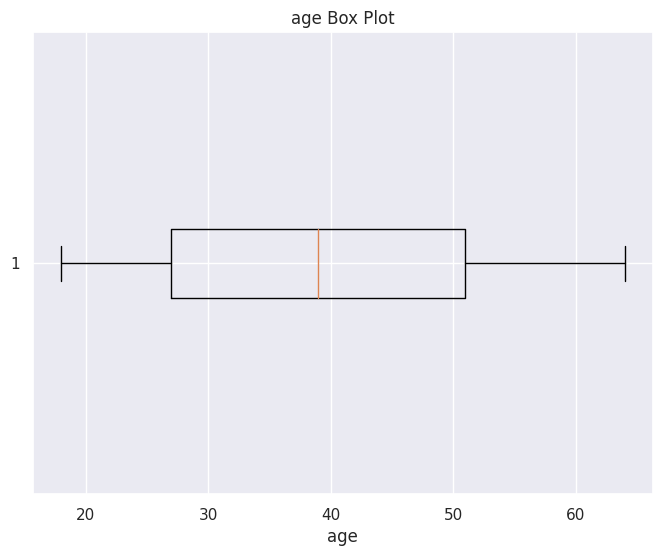

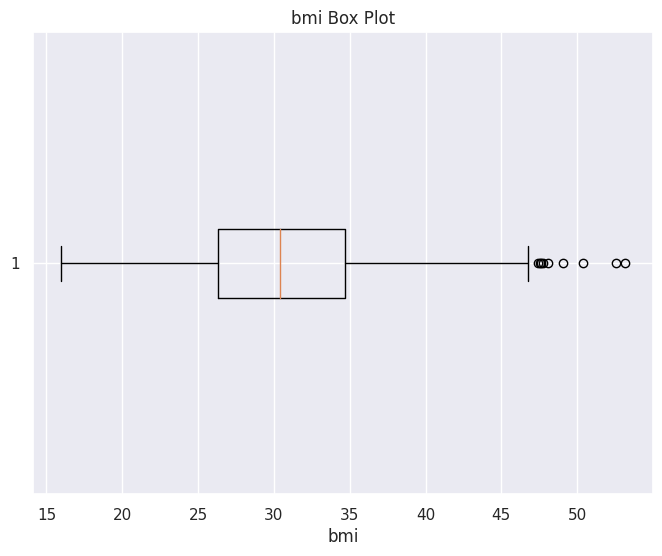

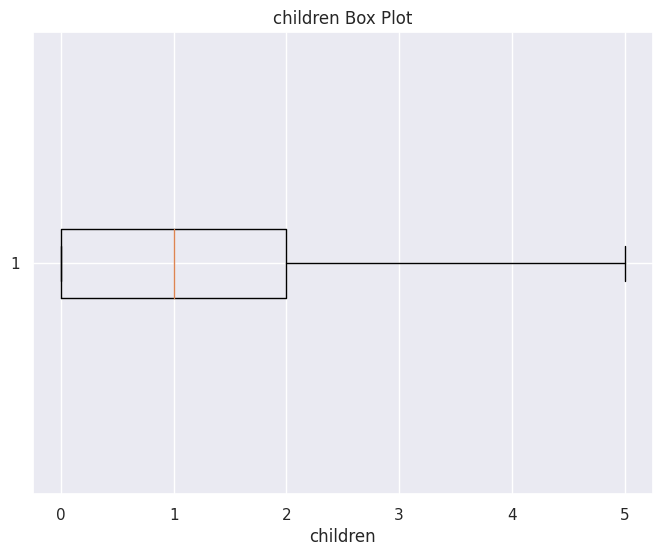

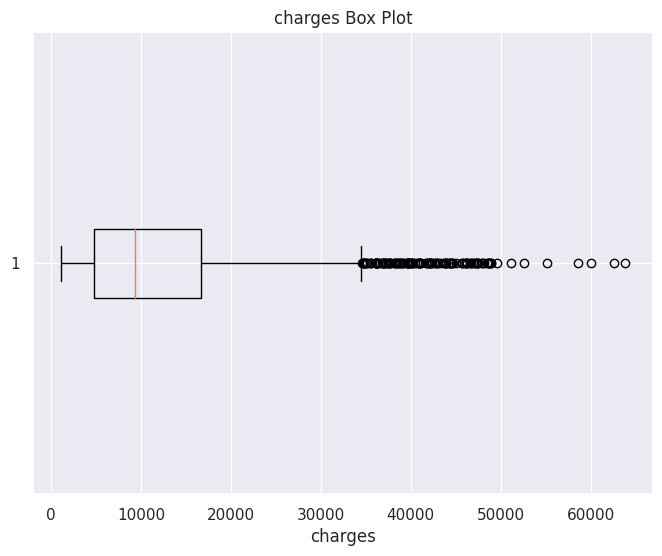

In [21]:
#BoxPlot Grafiği Çizimi
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[i], vert=False)
        plt.title(f'{i} Box Plot')
        plt.xlabel(i)
        plt.show()

BMİ değişkeninde yer alan outlire değerlerin aslında outlire olarak ele alınması doğru olmayacaktır çünki sağlık sigortasından yararlanan bireylerin sahip oldukları Bmi değerleri 18 altı ve 40 üstü değerlerede sahip olamsı mümkün olabileceğinden bu değerlerin outlire değer olarak ele alınmasına gerek yoktur. Bu nedenle üzerlerinde herhangi bir değişiklik yapılmamıştır. Charges değişkeni ele alınarak genel bir inceleme yapmak doğru olacaktır.

Note: Charges değişkeninde outlire değerler içerebileceğinden aşağıda Charges değişkenine göre elde edilen bulgular çok güvenilir olmayacaktır. Sadece genel bir değerlendirme yapmak amacıyla böyle devam edildi.

In [22]:
genel_ist = df.groupby('region')['charges'].describe()
genel_ist

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


Burada her bir bölgede yaşayan bireylerin yapmış oldukları sağlık sigortası ödemelerinin ortalama değerlerini görebilmekteyiz. Öncelikle burada dengeli bir veri olduğunu söyleyemeyiz tabı bu durum bölge bazında ortalama değerlerine göre yorum yapmamızı etkileyecektir. Buraya göre ele alırsak eğer en çok Southeast bölgesinde yer alan bireylerin diğer bölgelerde yaşayan bireylere göre ortalama daha fazla Sağlık harcaması yaptıkları görülebilmektedir. Ancak genel olarak diğer oranlarıda ele aldığımızda outlire değerlerin varlığıda görülebilmektedir.

In [23]:
genel_ist = df.groupby('sex')['charges'].describe()
genel_ist

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


Buradada kadın ve erkek arasında azda olsa dengeli bir veri olmadığını görebilmekteyiz. Tabi durum yine hesaplamalarda düşükte olsa değişkenlik gösterecektir. Buraya göre ele aldığımızda, sigortadan faydalanan erkek bireylerin kadın bireylere oranla daha yüksek sağlık ödemesi yaptıkları görülebilmektedir.Aynı zamanda bireylerin cinsiyeti yaptıkları sağlık sigortası harcamaları üzerinde bir etkiside bulunmamaktadır.  

In [24]:
genel_ist = df.groupby('smoker')['charges'].describe()
genel_ist

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


Burada görüldüğü üzere sağlık sigortasından faydalana bireylerin büyük bir çoğunluğu sigara tüketmemektedir. Ancak sigara tüketen bireylerin içmeyenlere oranla daha yüksek sağlık sigortası harcaması yaptıkları anlaşılmaktadır. Ayrıca bireylerin sigara kullanım durumları bireyinlerin yaptıkları sağlık harcaması üzerinde yüksek bir etkisi olduğu buradada görülebilmektedir.

In [25]:
genel_ist = df.groupby('children')['charges'].describe()
genel_ist

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


Dengeli bir veri olmasada(çoçuk sayısı bakımından) buradan anlaşıldığı üzere çoçuk sayısı arttıkça kişiye ödenen sağlık ücreti oranında artış olduğunu görebiliyoruz.

In [26]:
genel_ist = df.groupby('age_category')['charges'].describe()
genel_ist

,count,mean,std,min,25%,50%,75%,max
age_category,,,,,,,,
0-18,69.0,7086.217556,10198.459989,1121.8739,1633.04440,2198.189850,11272.331390,38792.68560
19-25,237.0,9669.526690,12130.704669,1241.5650,2007.94500,2741.948000,16586.497710,44501.39820
26-30,138.0,10086.132420,11081.514409,2302.3000,3425.59540,4344.951450,16637.732962,51194.55914
31-35,130.0,10929.364789,11654.255636,3260.1990,4595.46170,5255.515975,12238.121535,58571.07448
36-40,100.0,12526.341159,11812.033923,4399.7310,5944.76415,6669.480050,16517.589750,46113.51100
40-45,164.0,14083.207252,12265.748781,5415.6612,7070.55255,7736.097425,18777.339643,62592.87309
46-50,115.0,14849.841783,10721.007766,7147.1050,8563.38440,9414.920000,21227.929030,46151.12450
50-55,169.0,16760.638360,11755.346164,8442.6670,9957.72160,11013.711900,21195.818000,63770.42801
56-60,125.0,17145.494360,10941.328409,10577.0870,11743.29900,12333.828000,14001.133800,52590.82939


Burayı incelediğimizde sağlık sigortasından faydalanan bireylerin yaş değeri arttıkça yapmış oldukları sağlık harcamalarının arttığınıda görebiliriz.Özellikle outlire değerlerinin büyük çoğunluğunun 36 yaş ve altı bireylerin sağlık harcamalarında yer almakta olduğunu düşünebiliriz.

In [27]:
genel_ist = df.groupby('bmi_category')['charges'].describe()
genel_ist

,count,mean,std,min,25%,50%,75%,max
bmi_category,,,,,,,,
Ciddi Aşırı Zayıf,1.0,1694.796400,NaN,1694.7964,1694.796400,1694.7964,1694.796400,1694.79640
Aşırı Zayıf,19.0,9228.906068,7756.219308,1621.3402,2971.324000,6877.9801,13016.870375,32734.18630
Normal,225.0,10409.337709,7505.581314,1121.8739,4134.082450,8603.8234,15359.104500,35069.37452
Kilolu,386.0,10987.509891,8039.455318,1252.4070,4667.914013,8659.3780,15385.743188,38245.59327
Obez Tip 1,391.0,14419.674970,13573.159822,1131.5066,4744.669100,9563.0290,16691.454825,62592.87309
Obez Tip 2,225.0,17022.258883,15171.514137,1141.4451,5989.523650,11264.5410,27724.288750,58571.07448
Obez Tip 3,91.0,16784.615546,16658.190380,1146.7966,5419.864800,9748.9106,22468.178790,63770.42801


Buradanda görüldüğü üzere bireylerin sahip oldukları Bmi değerlerindeki artış yapmış oldukları sağlık sigortası harcamalarında da artışa neden olduğu görülebilmektedir.

Buradan sonraki kısımlarda yine Charges değişkeni baz alınarak bu sefer görsel yoldan incelenilmeye devam edildi.

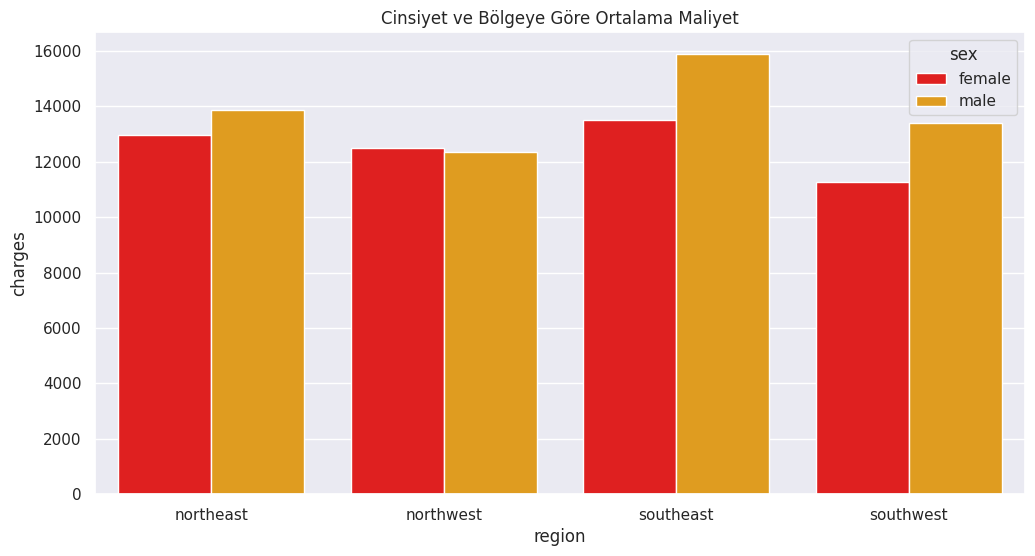

In [28]:
mean_charges = df.groupby(['region', 'sex'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', hue='sex', data=mean_charges , palette=["red", "orange"])
plt.title('Cinsiyet ve Bölgeye Göre Ortalama Maliyet')
plt.show()

Bölge bazında bireylerin cinsiyetine göre yapmış oldukları sağlık sigortası harcamaları incelendiğinde cinsiyeti erkek olan bireylerin cinsiyeti kadın olan bireylere oranla daha fazla sağlık sigortası harcaması yaptıkları görülebilmektedir.Yalnızca Northweast bölgesinde bulunan kadınların düşükde olsa erkeklere göre sağlık sigortası harcaması fazladır.

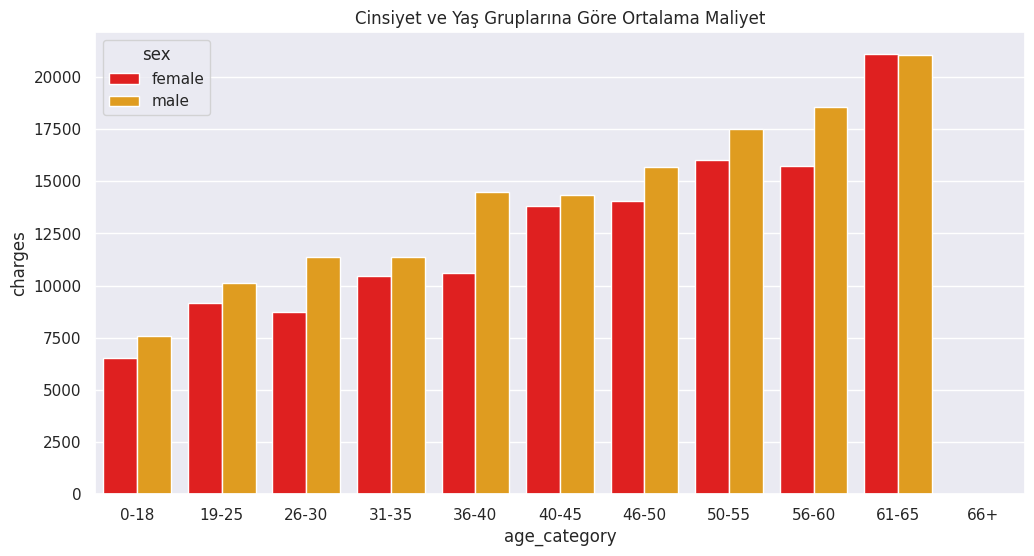

In [29]:
mean_charges = df.groupby(['age_category', 'sex'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='charges', hue='sex', data=mean_charges , palette=["red", "orange"])
plt.title('Cinsiyet ve Yaş Gruplarına Göre Ortalama Maliyet')
plt.show()


Cinsiyet bazında bireylerin yaş gruplarına göre yapmış oldukları sağlık sigortası harcamaları incelendiğinde yine her yaş grubundaki bireylerin çoğunluğu erkek bireylerden oluşmakta ve kadınlara oranla daha yüksek sağlık harcaması yaptıkları görülmektedir. Yine bu görselde görüldüğü üzere özellikle cinsiyeti erkek olan bireylerin yaşı arttıkçada sağlık harcamalarında artış olduğu gözlemlenebilmektedir. Kadınlarda bu durum yine yaşlarına göre sağlık sigortası harcaması artış göstersede erkeklere göre daha yavaş artış göstermektedir.


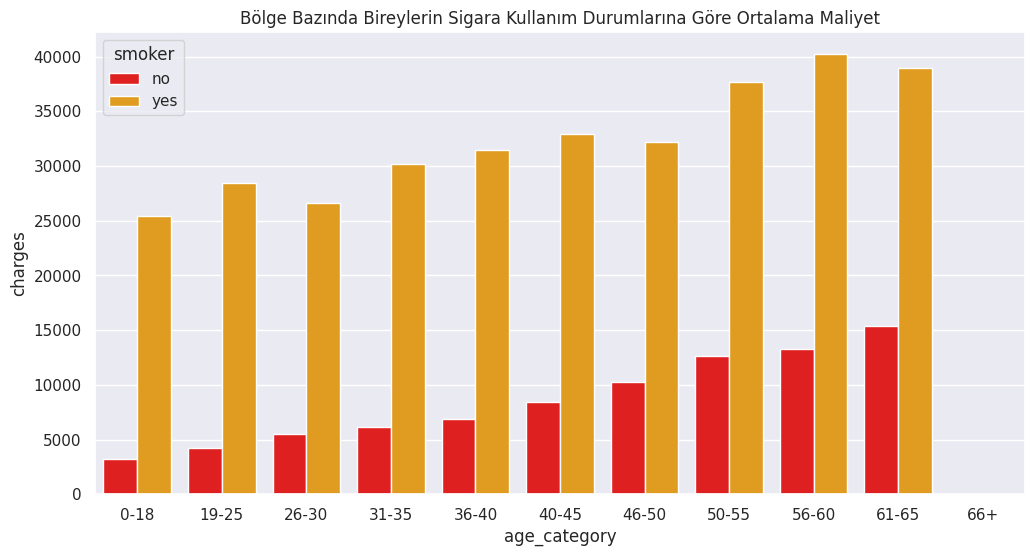

In [30]:
mean_charges = df.groupby(['age_category', 'smoker'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='charges', hue='smoker', data=mean_charges, palette=["red", "orange"])
plt.title('Bölge Bazında Bireylerin Sigara Kullanım Durumlarına Göre Ortalama Maliyet')
plt.show()


Daha önce genel_ist kısmında erkeklerin kadınlara göre daha yüksek oranda sağlık sigortası harcaması yaptıkları anlaşılmıştı. Buradan da anlaşıldığı üzere erkeklerin kadınlara göre daha yüksek oranda sigara içiminden dolayı sağlık harcaması yapmak zorunda kaldıkları anlaşılabilmektedir.

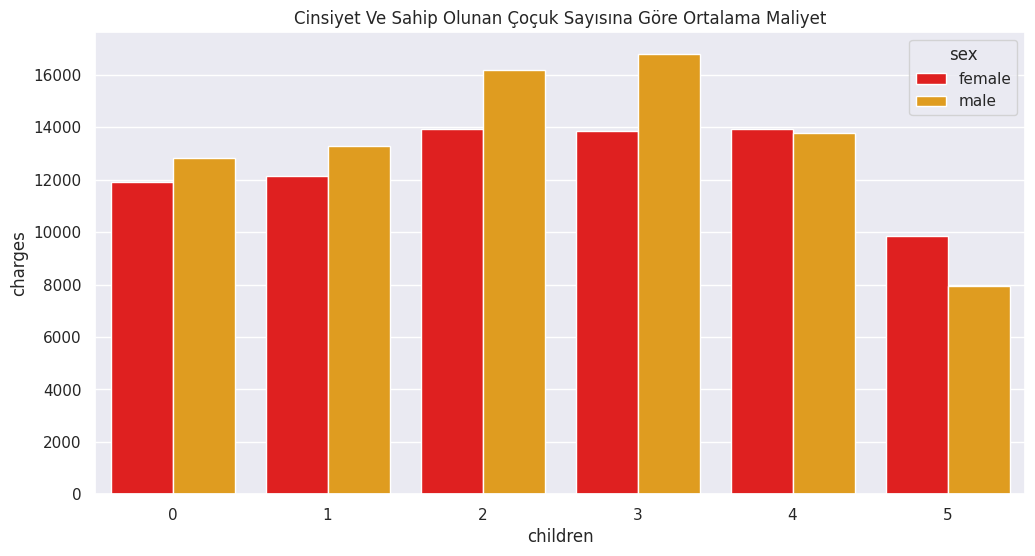

In [31]:
mean_charges = df.groupby(['children', 'sex'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='children', y='charges', hue='sex', data=mean_charges , palette=["red", "orange"])
plt.title('Cinsiyet Ve Sahip Olunan Çoçuk Sayısına Göre Ortalama Maliyet')
plt.show()


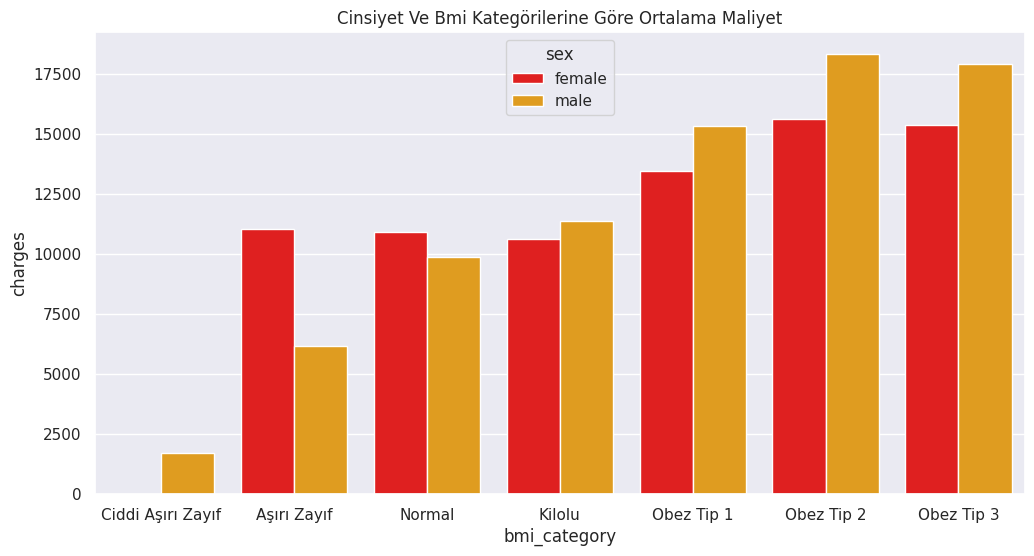

In [32]:
mean_charges = df.groupby(['bmi_category', 'sex'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='bmi_category', y='charges', hue='sex', data=mean_charges , palette=["red", "orange"])
plt.title('Cinsiyet Ve Bmi Kategörilerine Göre Ortalama Maliyet')
plt.show()


Cinsiyet bazında bireylerin bmi gruplarına göre yapmış oldukları sağlık sigortası harcamaları incelendiğinde her iki cinsiyettede bireylerin bmi değerleri arttıkça yapmış oldukları sağlık sigortası harcamalarıda artmaktadır. Ancak özelliklede normalin üstü kilolu olan erkeklerin kadınlara oranla daha fazla sağlık harcaması yaptıkları görülebilmektedir.

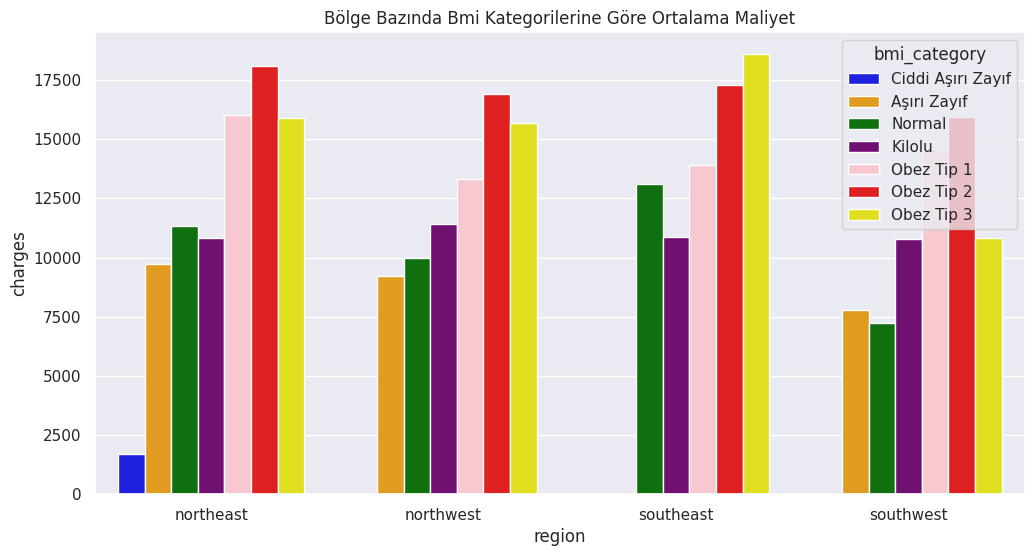

In [33]:
mean_charges = df.groupby(['region', 'bmi_category'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', hue='bmi_category', data=mean_charges , palette=["blue", "orange" , "green" , "purple" , "pink" , "red" , "yellow"])
plt.title('Bölge Bazında Bmi Kategorilerine Göre Ortalama Maliyet')
plt.show()

Bölge bazında bireylerin bmi gruplarına göre yapmış oldukları sağlık sigortası harcamaları incelendiğinde buradanda görüldüğü üzere her bölgede normalin üstündeki kilolu bireylerin yapmış oldukları sağlık sigortası harcaması fazladır.

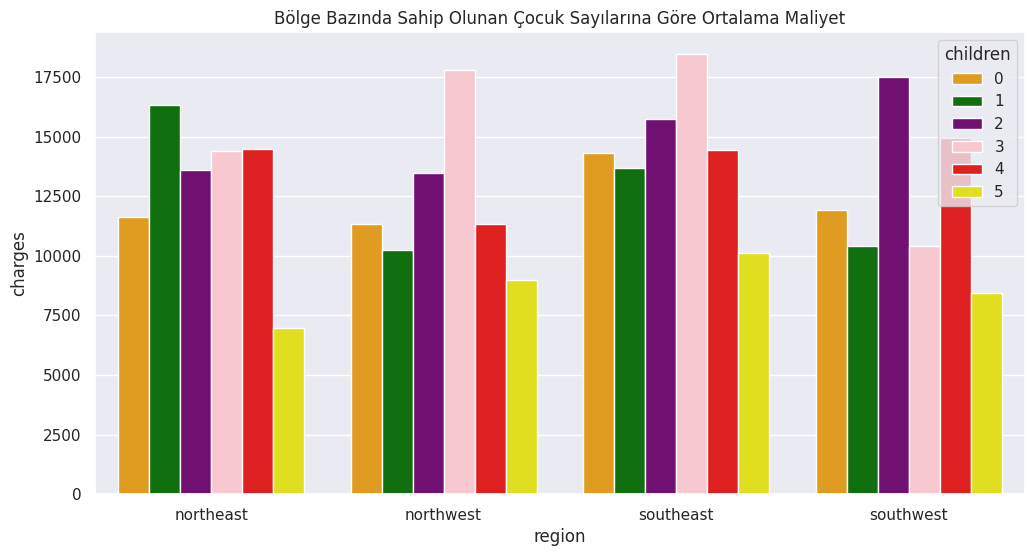

In [34]:
mean_charges = df.groupby(['region', 'children'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', hue='children', data=mean_charges , palette=["orange" , "green" , "purple" , "pink" , "red" , "yellow"])
plt.title('Bölge Bazında Sahip Olunan Çocuk Sayılarına Göre Ortalama Maliyet')
plt.show()

Bölge bazında bireylerin sahip oldukları çoçuk sayısına göre yapmış oldukları sağlık sigortası harcamaları incelendiğinde, northwest ve southeast bölgesinde en çok 2-3 çoçuk sahibi olan bireylerin daha fazla sağlık ücreti harcaması yapılırken southwest bölgesinde 2 ve 4 çoçuklu bireylerin daha fazla sağlık harcaması yaptıkları tespit edilebilmektedir. Geriye kalan northeast bölgesinde ise en çok 1 çoçuklu bireylerin daha fazla sağlık harcaması yaptığı görülebilmektedir.

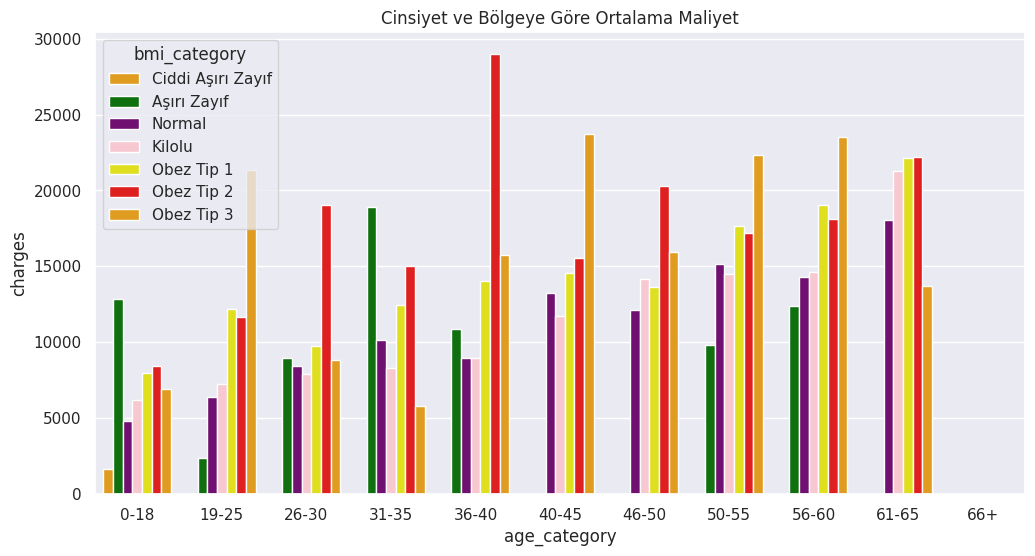

In [35]:
mean_charges = df.groupby(['age_category', 'bmi_category'])['charges'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='charges', hue='bmi_category', data=mean_charges , palette=["orange" , "green" , "purple" , "pink" , "yellow" , "red"])
plt.title('Cinsiyet ve Bölgeye Göre Ortalama Maliyet')
plt.show()

Bu grafikte yaş grupları ve bmi grubuna göre bireylerin yaptıkları sağlık harcamalarının nasıl olduğunu inceleyebilirsiniz.

In [36]:
# Charges değişeninde bulunan aykırı değerleri tespit etme
alt_deger = np.percentile(df['charges'], 0)
ust_deger = np.percentile(df['charges'], 75)


aykiri_indeksler = (df['charges'] < alt_deger) | (df['charges'] > ust_deger)
aykiri_satirlar = df[aykiri_indeksler]

print("Aykırı Değerlerin Satır İndeksleri:")
print(aykiri_indeksler[aykiri_indeksler].index)
print("Aykırı Değerlere Sahip Satırlar:")
print(aykiri_satirlar)


Aykırı Değerlerin Satır İndeksleri:
Int64Index([   0,    3,    9,   11,   14,   19,   23,   29,   30,   34,
            ...
            1304, 1307, 1308, 1313, 1314, 1318, 1321, 1323, 1328, 1337],
           dtype='int64', length=335)
Aykırı Değerlere Sahip Satırlar:
      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
3      33    male  22.705         0     no  northwest  21984.47061   
9      60  female  25.840         0     no  northwest  28923.13692   
11     62  female  26.290         0    yes  southeast  27808.72510   
14     27    male  42.130         0    yes  southeast  39611.75770   
...   ...     ...     ...       ...    ...        ...          ...   
1318   35    male  39.710         4     no  northeast  19496.71917   
1321   62    male  26.695         0    yes  northeast  28101.33305   
1323   42  female  40.370         2    yes  southeast  43896.37630   
1328   23  female  24.225       

In [37]:
#Baskılama (WİNSORİZATİON) İşlemi
df.sort_values(by='region', inplace=True)
medyan_degerler = df.groupby('region')['charges'].median()
for index, row in aykiri_satirlar.iterrows():
    region = row['region']
    yeni_deger = medyan_degerler[region]
    df.loc[index, 'charges'] = yeni_deger
print(df)


     age     sex     bmi  children smoker     region       charges  \
668   62    male  32.015         0    yes  northeast  10057.652025   
319   32    male  37.335         1     no  northeast   4667.607650   
844   53    male  30.495         0     no  northeast  10072.055050   
317   54    male  32.775         0     no  northeast  10435.065250   
315   52    male  33.250         0     no  northeast   9722.769500   
..   ...     ...     ...       ...    ...        ...           ...   
290   28  female  33.400         0     no  southwest   3172.018000   
888   22    male  39.500         0     no  southwest   1682.597000   
294   25    male  26.800         3     no  southwest   3906.127000   
918   61  female  28.200         0     no  southwest  13041.921000   
0     19  female  27.900         0    yes  southwest   8798.593000   

    age_category bmi_category  
668        61-65   Obez Tip 1  
319        31-35   Obez Tip 2  
844        50-55   Obez Tip 1  
317        50-55   Obez Tip 1  

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,7812.511870,3613.395537,1121.8739,4740.28715,8798.593,10057.652025,16586.49771


**Winsorization İşlemi** uygulanarak bölge bazında outlire değer içeren değerler her bölgenin medyan değeri ile güncellenmiştir.
Burada bölge bazında ayrı ayrı Winsoraziton işleminin yapılmasının amacı genelde her bölge kendi kurallarına göre bünyesinde yaşayan bireylere farklı tutarlarda ödeme yapması mümkün olduğu için böyle yapıldı.

In [39]:
# Bulduğum indeks değerlerine sahip satırları seçer
secilen_satirlar = df.loc[[22, 34, 175, 194, 281, 442, 488, 530, 543, 577, 584, 663, 681, 781, 791, 808, 819, 866, 901, 940, 1062, 1146, 1230, 1241, 1244, 1251, 1300, 1317]]

# Seçilen satırları yazdırır
print(secilen_satirlar)

      age     sex     bmi  children smoker     region       charges  \
22     18    male  34.100         0     no  southeast   1137.011000   
34     28    male  36.400         1    yes  southwest   8798.593000   
175    63  female  37.700         0    yes  southwest   8798.593000   
194    18    male  34.430         0     no  southeast   1137.469700   
281    54    male  40.565         3    yes  northeast  10057.652025   
442    18    male  43.010         0     no  southeast   1149.395900   
488    44  female  38.060         0    yes  southeast   9294.131950   
530    57    male  42.130         1    yes  southeast   9294.131950   
543    54  female  47.410         0    yes  southeast   9294.131950   
577    31  female  38.095         1    yes  northeast  10057.652025   
584    19    male  20.700         0     no  southwest   1242.816000   
663    18    male  33.660         0     no  southeast   1136.399400   
681    19    male  20.300         0     no  southwest   1242.260000   
781   

Güncellenen değerleri görebilirsiniz.

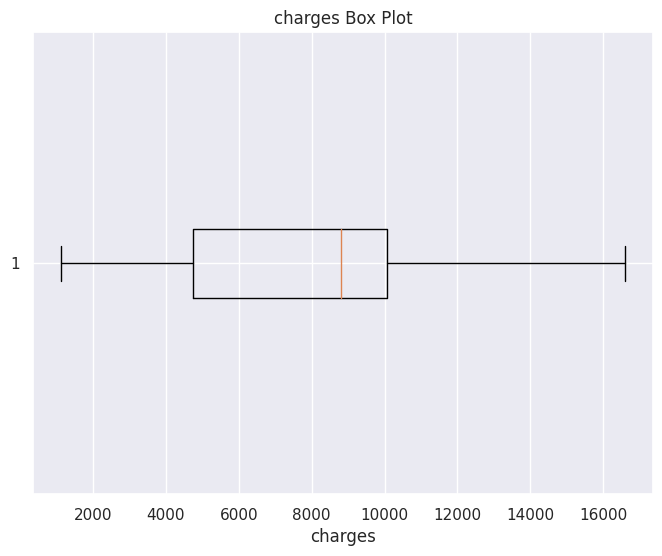

In [40]:
data = 'charges'
plt.figure(figsize=(8, 6))
plt.boxplot(df["charges"], vert=False)
plt.title(f'{data} Box Plot')
plt.xlabel(data)
plt.show()

Veri seti düzenlenerek Makine Öğrenmesi aşaması için hazır hale gelmiş oldu.

MAKİNE ÖĞRENMESİ

In [41]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'female' else 0) #Label Encoding

In [42]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0) #Label Encoding

In [43]:
df = pd.get_dummies(df, columns=['region'], prefix=['region']) #One_Hot_Encoding

In [44]:
df = pd.get_dummies(df, columns=['bmi_category'], prefix=['bmi_category']) #One_Hot_Encoding

In [45]:
df = pd.get_dummies(df, columns=['age_category'], prefix=['age_category']) #One_Hot_Encoding

In [46]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,...,age_category_19-25,age_category_26-30,age_category_31-35,age_category_36-40,age_category_40-45,age_category_46-50,age_category_50-55,age_category_56-60,age_category_61-65,age_category_66+
668,62,0,32.015,0,1,10057.652025,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
319,32,0,37.335,1,0,4667.607650,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
844,53,0,30.495,0,0,10072.055050,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
317,54,0,32.775,0,0,10435.065250,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
315,52,0,33.250,0,0,9722.769500,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# Veri Setini Yedekleme Ve Makine Öğrenmesi Algoritmaları İçin Değişkenleri Bağımlı Ve Bağımsız Olarak Ayırma
orjn = df
x = orjn.drop(columns=['charges'])
y = orjn.loc[: , ["charges"]]

In [48]:
#Veri Setini ölçeklendirme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [49]:
#Makine Öğrenmesi Algoritmalarını Çalışmaya Çağırma Ve Kurma
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Veri Setini Train Ve Test Olarak Ayırma
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    PoissonRegressor,
    BayesianRidge,
    LassoLars,
    OrthogonalMatchingPursuit,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
)
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Modelleri ve isimlerini bir liste içinde tutuldu
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("Poisson Regressor", PoissonRegressor()),
    ("Bayesian Ridge", BayesianRidge()),
    ("LassoLars", LassoLars()),
    ("OMP", OrthogonalMatchingPursuit()),
    ("RANSAC", RANSACRegressor()),
    ("Huber", HuberRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("Bagging", BaggingRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("NuSVR", NuSVR()),
    ("Linear SVR", LinearSVR()),
    ("LightGBM", LGBMRegressor()),
]


In [50]:
#Makine Öğrenmesi Algoritmalarını Sırayla Çalıştırma
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "MAPE", "RMSE", "R-squared"])

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_squared = r2_score(y_test, y_pred)

    results_df = results_df.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "MAPE": mape,
        "RMSE": rmse,
        "R-squared": r_squared
    }, ignore_index=True)

print(results_df)

<ipython-input-50-1df79de088d7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-50-1df79de088d7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-50-1df79de088d7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-50-1df79de088d7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 24
[LightGBM] [Info] Start training from score 7845.187299
                Model          MAE           MSE      MAPE         RMSE  \
0   Linear Regression  1679.626796  6.182842e+06  0.295422  2486.532089   
1               Ridge  1674.235662  6.170631e+06  0.294142  2484.075404   
2               Lasso  1674.781185  6.171897e+06  0.294058  2484.330199   
3          ElasticNet  1902.567754  7.258278e+06  0.344038  2694.119202   
4   Poisson Regressor  1881.121075  7.306541e+06  0.337043  2703.061404   
5      Bayesian Ridge  1682.400859  6.215099e+06  0.294914  

<ipython-input-50-1df79de088d7>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

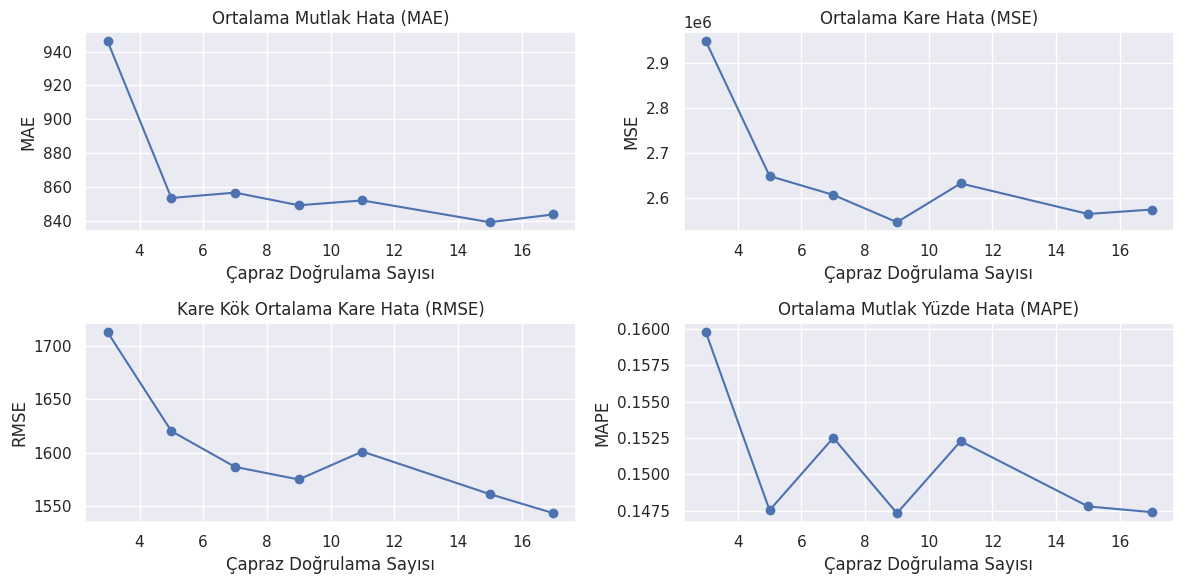

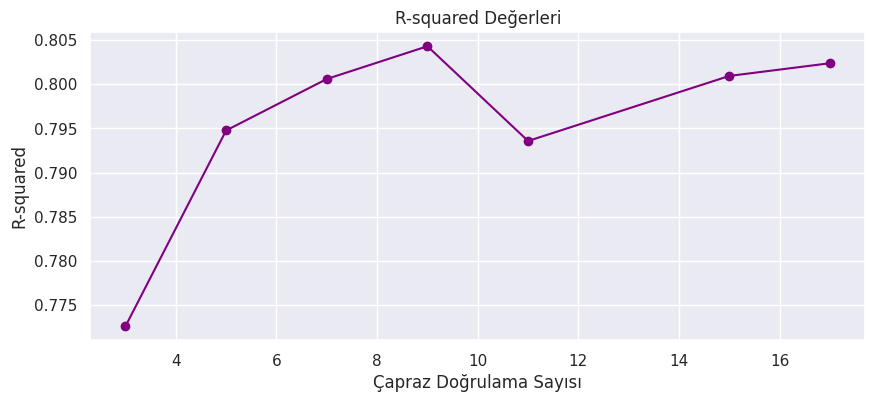

   Çapraz Doğrulama Sayısı  R-squared      MAPE         MAE           MSE  \
0                        3   0.772560  0.159753  946.003352  2.949411e+06   
1                        5   0.794774  0.147536  853.699850  2.648133e+06   
2                        7   0.800614  0.152511  856.853234  2.605999e+06   
3                        9   0.804328  0.147332  849.415723  2.544880e+06   
4                       11   0.793580  0.152278  852.243097  2.631630e+06   
5                       15   0.800960  0.147800  839.411975  2.563313e+06   
6                       17   0.802403  0.147405  844.015404  2.573168e+06   

          RMSE  
0  1712.594186  
1  1620.300323  
2  1586.845883  
3  1575.096242  
4  1601.211173  
5  1561.421146  
6  1543.552784  


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold  # KFold'ı içe aktarın
# Modeli tanımlama
model = GradientBoostingRegressor()

# Çapraz doğrulama sayılarını belirleme
cross_validation_numbers = [3, 5, 7, 9, 11, 15, 17]

results = {
    "Çapraz Doğrulama Sayısı": [],
    "R-squared": [],
    "MAPE": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

for cv_num in cross_validation_numbers:
    scores_mae = -cross_val_score(model, x, y, cv=cv_num, scoring='neg_mean_absolute_error')
    scores_mse = -cross_val_score(model, x, y, cv=cv_num, scoring='neg_mean_squared_error')

    mape_scores = []
    r_squared_scores = []

    for train_idx, test_idx in KFold(n_splits=cv_num).split(x):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # MAPE hesaplama
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_scores.append(mape)

        # R-squared hesaplama
        r_squared = r2_score(y_test, y_pred)
        r_squared_scores.append(r_squared)

    scores_rmse = np.sqrt(scores_mse)

    results["Çapraz Doğrulama Sayısı"].append(cv_num)
    results["MAE"].append(np.mean(scores_mae))
    results["MSE"].append(np.mean(scores_mse))
    results["RMSE"].append(np.mean(scores_rmse))
    results["MAPE"].append(np.mean(mape_scores))
    results["R-squared"].append(np.mean(r_squared_scores))

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(results["Çapraz Doğrulama Sayısı"], results["MAE"], marker='o')
plt.title('Ortalama Mutlak Hata (MAE)')
plt.xlabel('Çapraz Doğrulama Sayısı')
plt.ylabel('MAE')

plt.subplot(2, 2, 2)
plt.plot(results["Çapraz Doğrulama Sayısı"], results["MSE"], marker='o')
plt.title('Ortalama Kare Hata (MSE)')
plt.xlabel('Çapraz Doğrulama Sayısı')
plt.ylabel('MSE')

plt.subplot(2, 2, 3)
plt.plot(results["Çapraz Doğrulama Sayısı"], results["RMSE"], marker='o')
plt.title('Kare Kök Ortalama Kare Hata (RMSE)')
plt.xlabel('Çapraz Doğrulama Sayısı')
plt.ylabel('RMSE')

plt.subplot(2, 2, 4)
plt.plot(results["Çapraz Doğrulama Sayısı"], results["MAPE"], marker='o')
plt.title('Ortalama Mutlak Yüzde Hata (MAPE)')
plt.xlabel('Çapraz Doğrulama Sayısı')
plt.ylabel('MAPE')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(results["Çapraz Doğrulama Sayısı"], results["R-squared"], marker='o', color='purple')
plt.title('R-squared Değerleri')
plt.xlabel('Çapraz Doğrulama Sayısı')
plt.ylabel('R-squared')
plt.show()

results_df = pd.DataFrame(results)
print(results_df)

In [52]:
# en iyi hiperparametre değerlerini belirlemek
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [25,50, 75,100, 200],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'max_depth': [2,3, 4, 5],

}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=17, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1) #cv 17 olarak belirlendi
grid_search.fit(x_train, y_train)
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi sonuç (RMSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE" , rmse)

Fitting 17 folds for each of 80 candidates, totalling 1360 fits
En iyi hiperparametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
En iyi sonuç (RMSE): 2598862.5049431846
R-squared: 0.8707733999754215
MAE: 691.9230274450247
MAPE: 0.11302356436387238
MSE: 1527311.2419926445
RMSE 1235.8443437555736


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sonuç olarak veri setimiz üzerinde en iyi tahmin yapan model **Gradient Boosting Regression** olmuştur.